In [15]:
using Roots

In [16]:
#initially 
terms = parse.(Int,(split("2 & 2 & 3 & 3 & 6 & 6 & 9 & 9", " & ")))
alphas = [0.0,0.0]
for i in 3:10
    push!(alphas,log2(terms[i-2])/i)
end

wasd= zeros(42)
l=1
while 4l <length(wasd)
    wasd[4l-1] = l*log2(3)/(4l-1)
    wasd[4l] = l*log2(3)/(4l)
    wasd[4l+1] = l*log2(3)/(4l+1)
    wasd[4l+2] = l*log2(3)/(4l+2)
    l+=1
end

for i in 1:10
    wasd[i]=alphas[i]
end


In [332]:
#CATS

function catDecomp(k,multipleCats)

    t = multipleCats ? [1,1,√3,2,3,3] : [1,1,2,2,3,3]
    t = big.(t)
    nbCopies = multipleCats ? [1,1,2,1,1,1] : fill(1,6)
    hows = fill("Direct-calculations",6)

    for i in 7:k
        how = ""
        nbcopy = 1
        temp = multipleCats ? big(2)^((i+1)*0.396240625180289) : big(2)^(i)

        #splits 
        for n in 2: i-2
            m = i-n
            if t[n+1]*t[m+1] < temp
                temp = t[n+1]*t[m+1]
                how = "split-into-cat$(n+1)-and-cat$(m+1)"
                nbcopy = max(nbCopies[n+1],nbCopies[m+1])
            end
        end

        #cuts
        for n in 1:i-1
            if 2(t[n]*t[i-n]) < temp
                temp = min(temp, 2(t[n]*t[i-n]))
                how = "cut-into-cat$(n)-and-cat$(i-n)"
                nbcopy = lcm(nbCopies[n],nbCopies[i-n])
            end
        end
        
        push!(nbCopies,nbcopy)
        push!(hows,how)
        push!(t,temp)
    end
    
    
    if multipleCats
        return [1:k t round.(Float64.(log2.(t)./(1:k)),digits=4) hows nbCopies]
    end
    return [1:k t round.(Float64.(log2.(t)./(1:k)),digits=4) hows]
end

catDecomp (generic function with 1 method)

In [329]:
#STARS

function starsDecomp(k2,multipleStars)
    
    t = catDecomp(2*k2,multipleStars)[:,2]
    s = [2.0,2.0]
    hows = multipleStars ? ["Direct-calculation","Catification"] : ["cut","Catification"]
    nbCopies = [1,1]


    if multipleStars
        s=[big(1.4678),big(2)]
        nbCopies = [6,1]
        
        #s=[1.5538,2]
    end

    for i in 3:k2
        how = multipleStars ? "magic-state-injection" : "magic-state-injection"
        temp = multipleStars ? big(2)^((i+1)*0.396240625180289) : 
        (i%4 == 3 ? round(2^(0.396240625180289*(i+1))) : big(2)^(i+1))
        #catification
        if  2*t[i] < temp
            temp = 2*t[i]
            how = "Catification-into-cat$i"
        end

        #cuts stars
        for n in 1:i-1
            if temp > 2(t[n]*s[i-n])
                temp = 2(t[n]*s[i-n])
                how = "cut-into-cat$n-and-star$(i-n)"
            end

        end
        #splits stars
        for x in 1:i-1
            n = x+1
            y = i-x
            m = y+1
            
            if temp > 2*t[n]*t[m]
                temp = 2*t[n]*t[m]
                how = "split-into-cat$n-and-cat$m"
            end

        end

       

        if multipleStars
            α = log2(temp)/(i+1)
        #special case of splits
            if i > 2
                nbterm = t[i+1]^6*10
                removed = 6*(i+1)
                newa = log2(nbterm)/removed
                if newa < α
                    temp = 2^((i+1)*newa)
                    α = newa
                    how = "efficient-split-into-star1-and-cat$(i+1)"
                end
            end

            #star fusion

            nbterm_all_remove = t[2i]
            #      partial      cat
            f(x) = x^-2   +   t[2i]*x^-(2i+2)-1
            z = find_zero(f,1.5)
            newa = log2(z)

            if newa < α
                temp = 2^((i+1)*newa)
                α = newa
                how = "partially-fused-two-copies-of-star$i"
            end
        end
        push!(hows,how)
        push!(s,temp)
    end
    
    return [1:k2 s Float64.(log2.(s)./((1:k2).+1)) hows]
end


starsDecomp (generic function with 1 method)

In [353]:
starsDecomp(20,true)

20×4 Matrix{Any}:
  1    1.4678   0.276828  "Direct-calculation"
  2    2.0      0.333333  "Catification"
  3    2.74929  0.364765  "partially-fused-two-copies-of-star3"
  4    3.80632  0.385679  "partially-fused-two-copies-of-star4"
  5    4.4034   0.356436  "efficient-split-into-star1-and-cat6"
  6    6.0      0.36928   "Catification-into-cat6"
  7    8.13593  0.378038  "partially-fused-two-copies-of-star7"
  8   11.3739   0.389739  "partially-fused-two-copies-of-star8"
  9   13.2102   0.372358  "efficient-split-into-star1-and-cat10"
 10   18.0      0.379084  "Catification-into-cat10"
 11   24.2763   0.383456  "partially-fused-two-copies-of-star11"
 12   34.0622   0.391546  "partially-fused-two-copies-of-star12"
 13   39.6306   0.379182  "efficient-split-into-star1-and-cat14"
 14   54.0      0.383659  "Catification-into-cat14"
 15   72.619    0.386392  "partially-fused-two-copies-of-star15"
 16  102.087    0.392568  "partially-fused-two-copies-of-star16"
 17  118.892    0.382972  "ef

In [367]:
catDecomp(65,false)

65×4 Matrix{Any}:
  1         1  0.0     "Direct-calculations"
  2         1  0.0     "Direct-calculations"
  3         2  0.3333  "Direct-calculations"
  4         2  0.25    "Direct-calculations"
  5         3  0.317   "Direct-calculations"
  6         3  0.2642  "Direct-calculations"
  7         6  0.3693  "split-into-cat3-and-cat6"
  8         6  0.3231  "split-into-cat4-and-cat6"
  9         9  0.3522  "split-into-cat5-and-cat6"
 10         9  0.317   "split-into-cat6-and-cat6"
 11        18  0.3791  "split-into-cat3-and-cat10"
 12        18  0.3475  "split-into-cat4-and-cat10"
 13        27  0.3658  "split-into-cat5-and-cat10"
  ⋮                    
 54   1594323  0.3816  "split-into-cat6-and-cat50"
 55   3188646  0.3928  "split-into-cat3-and-cat54"
 56   3188646  0.3858  "split-into-cat4-and-cat54"
 57   4782969  0.3893  "split-into-cat5-and-cat54"
 58   4782969  0.3826  "split-into-cat6-and-cat54"
 59   9565938  0.393   "split-into-cat3-and-cat58"
 60   9565938  0.3865  "split

In [163]:
using Plots

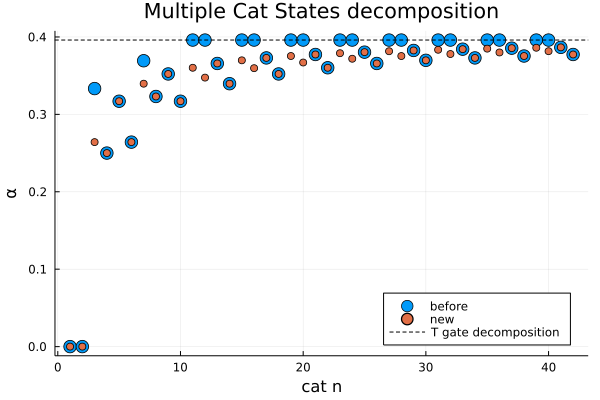

In [165]:
p = plot(title="Multiple Cat States decomposition",ylabel="α",xlabel="cat n")
scatter!(p,min.(wasd,0.396),markersize=7,legend=:bottomright,label="before")
scatter!(p,catDecomp(42,true)[:,3],label="new")
hline!([0.396], linestyle=:dash,color = :black, linewidth = 1.0, label="T gate decomposition")

#savefig(p,"Multiple Cat States")

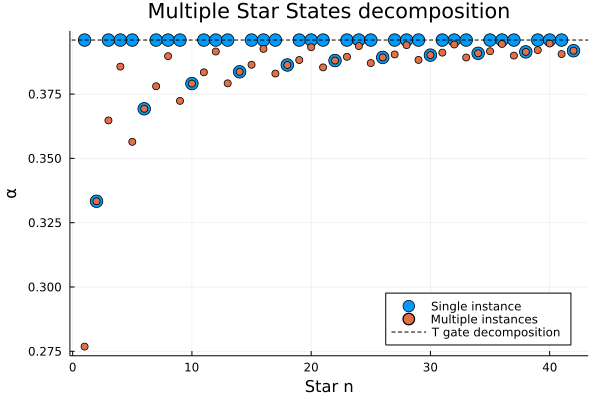

In [286]:
p2 = plot(title="Multiple Star States decomposition",ylabel="α",xlabel="Star n")
scatter!(p2,min.(starsDecomp(42,false)[:,3],0.396),markersize=7,legend=:bottomright,label="Single instance")
scatter!(p2,min.(starsDecomp(42,true)[:,3],0.396),label="Multiple instances")
hline!([0.396], linestyle=:dash,color = :black, linewidth = 1.0, label="T gate decomposition")
#savefig(p2,"Multiple Star States")

In [179]:
#asymetric star fusion

multiple = false


cat_terms = catDecomp(40,multiple)[:,2]
stars_alphas = starsDecomp(40,multiple)[:,3]
for k = 3: 40
println("---------$k------------")

    f(x) = x^-2   +   cat_terms[k]*x^-(k+2)-1
    z = find_zero(f,1.5)
    newa = log2(z)


    for i=1:k-1
        i >= k-i && continue
        if stars_alphas[i] > newa && stars_alphas[k-i] > newa
            println("combine star ",i, " and star ",k-i, " for α = ", "$(newa)"[1:6])
        end
    end
end

---------3------------
---------4------------
combine star 1 and star 3 for α = 0.3809
---------5------------
---------6------------
combine star 1 and star 5 for α = 0.3647
---------7------------
---------8------------
combine star 1 and star 7 for α = 0.3856
combine star 3 and star 5 for α = 0.3856
---------9------------
---------10------------
combine star 1 and star 9 for α = 0.3731
combine star 3 and star 7 for α = 0.3731
---------11------------
---------12------------
combine star 1 and star 11 for α = 0.3881
combine star 3 and star 9 for α = 0.3881
combine star 4 and star 8 for α = 0.3881
combine star 5 and star 7 for α = 0.3881
---------13------------
combine star 4 and star 9 for α = 0.3992
---------14------------
combine star 1 and star 13 for α = 0.3780
combine star 3 and star 11 for α = 0.3780
combine star 4 and star 10 for α = 0.3780
combine star 5 and star 9 for α = 0.3780
---------15------------
---------16------------
combine star 1 and star 15 for α = 0.3897
combine st

In [178]:
#complemented asymetric star fusion

multiple = false

cat_terms = catDecomp(42,multiple)[:,2]
stars_alphas = starsDecomp(42,multiple)[:,3]
for k = 1: 20
    for n=1:20
        nbterm = 2*cat_terms[n+k+2]    
        newa = log2(nbterm)/(k+n+2)
        
        if stars_alphas[k] > newa && stars_alphas[n] > newa
            println("complemented-fuse star ",k, " and star ",n, " for α = ", "$(newa)"[1:6])
        end
    end
end

complemented-fuse star 1 and star 3 for α = 0.4308
complemented-fuse star 1 and star 7 for α = 0.4169
complemented-fuse star 1 and star 11 for α = 0.4110
complemented-fuse star 1 and star 15 for α = 0.4077
complemented-fuse star 1 and star 19 for α = 0.4056
complemented-fuse star 3 and star 1 for α = 0.4308
complemented-fuse star 3 and star 3 for α = 0.4481
complemented-fuse star 3 and star 5 for α = 0.4169
complemented-fuse star 3 and star 7 for α = 0.4308
complemented-fuse star 3 and star 9 for α = 0.4110
complemented-fuse star 3 and star 11 for α = 0.4221
complemented-fuse star 3 and star 13 for α = 0.4077
complemented-fuse star 3 and star 15 for α = 0.4169
complemented-fuse star 3 and star 17 for α = 0.4056
complemented-fuse star 3 and star 19 for α = 0.4135
complemented-fuse star 5 and star 3 for α = 0.4169
complemented-fuse star 5 and star 7 for α = 0.4110
complemented-fuse star 5 and star 11 for α = 0.4077
complemented-fuse star 5 and star 15 for α = 0.4056
complemented-fuse sta

In [291]:
using Latexify
set_default(fmt = "%.4f")
copy_to_clipboard(true)


true

In [352]:

plz = catDecomp(40,true)

result = [plz[:,1] plz[:,end] round.(Int,plz[:,2].^plz[:,end]) plz[:,3] plz[:,4]]

latextabular(result)

"\\begin{tabular}{ccccc}\n\$1\$ & \$1\$ & \$1\$ & \$0.0\$ & \$Direct - calculations\$\\\\\n\$2\$ & \$1\$ & \$1\$ & \$0.0\$ & \$Direct - calculations\$\\\\\n\$3\$ & \$2\$ & \$3\$ & \$0.2642\$ & \$Direct - calculations\$\\\\\n\$4\$ & \$1\$ & \$2\$ & \$0.25\$ & \$Direct - calculations\$\\\\\n\$5\$ & \$1\$ & \$3\$ & \$0.317\$ & \$Direct" ⋯ 2214 bytes ⋯ "lit - into - cat5 - and - cat34\$\\\\\n\$38\$ & \$1\$ & \$19683\$ & \$0.3754\$ & \$split - into - cat6 - and - cat34\$\\\\\n\$39\$ & \$2\$ & \$1162261467\$ & \$0.3861\$ & \$split - into - cat3 - and - cat38\$\\\\\n\$40\$ & \$1\$ & \$39366\$ & \$0.3816\$ & \$split - into - cat4 - and - cat38\$\\\\\n\\end{tabular}\n"

In [262]:
latexify("alpha-asd",latex=false)

L"$alpha - asd$"

In [225]:
latexify(Float64(big(1)/3))

L"$0.3333$"

In [279]:
round(2^(0.396240625180289*12))

27.0

In [324]:
catDecomp(40,true)[3:4:end,:]

10×4 Matrix{Any}:
  3      1.73205  0.2642  "Direct-calculations"
  7      5.19615  0.3396  "split-into-cat3-and-cat6"
 11     15.5885   0.3602  "split-into-cat3-and-cat10"
 15     46.7654   0.3698  "split-into-cat3-and-cat14"
 19    140.296    0.3754  "split-into-cat3-and-cat18"
 23    420.888    0.379   "split-into-cat3-and-cat22"
 27   1262.67     0.3816  "split-into-cat3-and-cat26"
 31   3788.0      0.3835  "split-into-cat3-and-cat30"
 35  11364.0      0.3849  "split-into-cat3-and-cat34"
 39  34092.0      0.3861  "split-into-cat3-and-cat38"

In [361]:
f(x) = x^-2   +   9x^-(12)-1
z = find_zero(f,1.5)
newa = log2(z)

0.3731609523477455

In [371]:
f(x) = x^-2   +   9x^-(12)-1
z = find_zero(f,1.5)
newa = log2(z)

0.3731609523477455

In [377]:
k=20
catTerms = catDecomp(k,false)[:,2]

for i in 1:k
    f(x) = x^-2   +   catTerms[i]x^-(i+2)-1
    z = find_zero(f,1.5)
    newa = log2(z)
   println("symmetric diff $i --> $(newa)") 
end

symmetric diff 1 --> 0.4056852313758246
symmetric diff 2 --> 0.3471209568153087
symmetric diff 3 --> 0.43067910546534377
symmetric diff 4 --> 0.380906771550623
symmetric diff 5 --> 0.40177694275147807
symmetric diff 6 --> 0.36476466841308286
symmetric diff 7 --> 0.41869515155886083
symmetric diff 8 --> 0.38567915974381023
symmetric diff 9 --> 0.4001593429840637
symmetric diff 10 --> 0.3731609523477455
symmetric diff 11 --> 0.4129247090783579
symmetric diff 12 --> 0.38819117663033487
symmetric diff 13 --> 0.39927381614426033
symmetric diff 14 --> 0.3780384447648212
symmetric diff 15 --> 0.4095202854831059
symmetric diff 16 --> 0.3897392590206834
symmetric diff 17 --> 0.39871489704905844
symmetric diff 18 --> 0.3812195862242012
symmetric diff 19 --> 0.4072720158976821
symmetric diff 20 --> 0.3907884395989148


In [ ]:

#symmetric diff 1 --> 0.4056852313758246
#symmetric diff 2 --> 0.3471209568153087
#symmetric diff 3 --> 0.43067910546534377
#symmetric diff 4 --> 0.380906771550623
#symmetric diff 5 --> 0.40177694275147807
#symmetric diff 6 --> 0.36476466841308286
#symmetric diff 7 --> 0.41869515155886083
#symmetric diff 8 --> 0.38567915974381023
#symmetric diff 9 --> 0.4001593429840637
#symmetric diff 10 --> 0.3731609523477455

In [373]:
cats = catDecomp(10,false)[:,2]

10-element Vector{Any}:
 1
 1
 2
 2
 3
 3
 6
 6
 9
 9